## Dataset

In this homework, we will use the Laptops price dataset from Kaggle.

In [3]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
df = pd.read_csv(url)

# Check the first few rows to confirm the data loaded correctly
print(df.head())


                                              Laptop Status   Brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...    New    Asus   
1  Alurin Go Start Intel Celeron N4020/8GB/256GB ...    New  Alurin   
2  ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...    New    Asus   
3  MSI Katana GF66 12UC-082XES Intel Core i7-1270...    New     MSI   
4  HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...    New      HP   

        Model            CPU  RAM  Storage Storage type       GPU  Screen  \
0  ExpertBook  Intel Core i5    8      512          SSD       NaN    15.6   
1          Go  Intel Celeron    8      256          SSD       NaN    15.6   
2  ExpertBook  Intel Core i3    8      256          SSD       NaN    15.6   
3      Katana  Intel Core i7   16     1000          SSD  RTX 3050    15.6   
4         15S  Intel Core i5   16      512          SSD       NaN    15.6   

  Touch  Final Price  
0    No      1009.00  
1    No       299.00  
2    No       789.00  
3    No      1199.

## Preparing the dataset

First, we'll normalize the names of the columns:

In [4]:
# Apply changes to the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Display the modified column names
print(df.columns)


Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')


## Next, use only the following columns:

'ram',
'storage',
'screen',
'final_price'

In [5]:
# Keep only the selected columns
df_filtered = df[['ram', 'storage', 'screen', 'final_price']]

# Display the first few rows of the filtered DataFrame to verify
print(df_filtered.head())


   ram  storage  screen  final_price
0    8      512    15.6      1009.00
1    8      256    15.6       299.00
2    8      256    15.6       789.00
3   16     1000    15.6      1199.00
4   16      512    15.6       669.01


## EDA

Look at the final_price variable. Does it have a long tail?

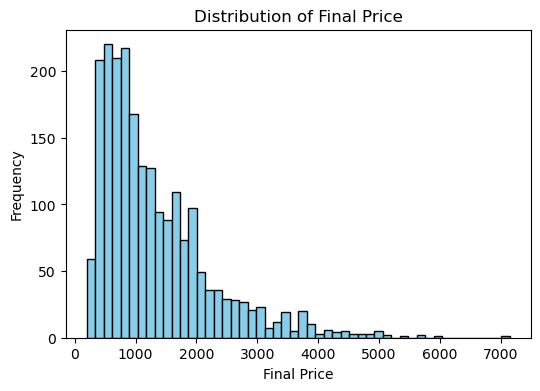

In [7]:
import matplotlib.pyplot as plt

# Plot histogram of final_price
plt.figure(figsize=(6, 4))
plt.hist(df_filtered['final_price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Price')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()


## Question 1

There's one column with missing values. What is it?

In [9]:
# Check for missing values in each column
missing_values = df_filtered.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])



screen    4
dtype: int64


## Question 2

What's the median (50% percentile) for variable 'ram'?

In [10]:
# Calculate the median for the 'ram' column
median_ram = df_filtered['ram'].median()

# Display the result
print("Median RAM:", median_ram)


Median RAM: 16.0


## Prepare and split the dataset

Shuffle the dataset (the filtered one you created above), use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [11]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [18]:
import numpy as np

# Set seed to 42 for reproducibility
np.random.seed(42)

# Get total number of examples
n = len(df)

# Calculate the number of examples for each set (train 60%, val 20%, test 20%)
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - (n_train + n_val)  

# Display the sizes of the train, val, and test sets
print(f"Number of training examples: {n_train}")
print(f"Number of validation examples: {n_val}")
print(f"Number of test examples: {n_test}")

# Shuffle the dataset
idx = np.arange(n)
np.random.shuffle(idx)

# Shuffle the DataFrame based on the randomized indices
df_shuffled = df.iloc[idx]

# Split the shuffled DataFrame into train, val, and test sets
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

# Display the first few rows of each set
print("Training DataFrame:")
print(df_train.head())

print("Validation DataFrame:")
print(df_val.head())

print("Test DataFrame:")
print(df_test.head())


Number of training examples: 1296
Number of validation examples: 432
Number of test examples: 432
Training DataFrame:
                                                 laptop       status    brand  \
2079  MSI Modern 15 A11SBU-620XES Intel Core i7-1165...  Refurbished      MSI   
668   Thomson Neo White Intel Celeron N4020/4GB/64GB...          New  Thomson   
2073  MSI Modern 14 B11SB-420XES Intel Core i7-1165G...  Refurbished      MSI   
1113  ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...          New     Asus   
788   Acer Predator Triton 500 SE PT516-51s-75K6 Int...          New     Acer   

         model                cpu  ram  storage storage_type       gpu  \
2079    Modern      Intel Core i7   32     1000          SSD    MX 450   
668        Neo      Intel Celeron    4       64         eMMC       NaN   
2073    Modern      Intel Core i7   32     1000          SSD    MX 450   
1113   ZenBook  Intel Evo Core i7   16      512          SSD       NaN   
788   Predator      Intel